In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


In [3]:
print("#### DENSE 1 ####\n")
dense1.info()

#### DENSE 1 ####

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[ 0.05201905  0.06274537  0.06543433  0.0652483 ]
 [-0.03599318  0.03239917 -0.04751024  0.06543695]
 [ 0.03833793 -0.04230782  0.10393964 -0.0992701 ]
 [ 0.01226781  0.00058687 -0.10646765  0.01973208]
 [ 0.06486292  0.05632043 -0.13752562 -0.06210704]
 [-0.16707231  0.11572271 -0.01849767 -0.08881226]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[ 1.20668054  0.37659249 -0.4239803  -0.32845323 -0.9479043  -0.8787752 ]
 [ 1.14670239  0.40182531 -0.46663794 -0.29092592 -0.85235921 -0.68372273]
 [ 0.64471124  0.2214521  -0.32421939  0.00489084 -0.05483518 -0.44425936]]



In [4]:
print("#### ACTIVATION 1 ####\n")
activation1.info()

#### ACTIVATION 1 ####

Inputs:
[[ 1.20668054  0.37659249 -0.4239803  -0.32845323 -0.9479043  -0.8787752 ]
 [ 1.14670239  0.40182531 -0.46663794 -0.29092592 -0.85235921 -0.68372273]
 [ 0.64471124  0.2214521  -0.32421939  0.00489084 -0.05483518 -0.44425936]]

Outputs:
[[1.20668054 0.37659249 0.         0.         0.         0.        ]
 [1.14670239 0.40182531 0.         0.         0.         0.        ]
 [0.64471124 0.2214521  0.         0.00489084 0.         0.        ]]



In [5]:
print("#### DENSE 2 ####\n")
dense2.info()

#### DENSE 2 ####

Inputs:
[[1.20668054 0.37659249 0.         0.         0.         0.        ]
 [1.14670239 0.40182531 0.         0.         0.         0.        ]
 [0.64471124 0.2214521  0.         0.00489084 0.         0.        ]]

Weights:
[[ 0.15344218 -0.06117413 -0.10012626  0.02669648 -0.02983276 -0.09018255]
 [-0.15356856 -0.21663945  0.00764196  0.06399732 -0.0631799   0.07753077]
 [-0.10586545 -0.0742393   0.10686153  0.07169391  0.04468746  0.08578267]]

Biases:
[0. 0. 0.]

Outputs:
[[ 0.16211798 -0.26689298 -0.15570374]
 [ 0.1513712  -0.26314865 -0.1512274 ]
 [ 0.08550933 -0.14666964 -0.08434245]]



In [6]:
print("#### ACTIVATION 2 ####\n")
activation2.info()

#### ACTIVATION 2 ####

Inputs:
[[ 0.16211798 -0.26689298 -0.15570374]
 [ 0.1513712  -0.26314865 -0.1512274 ]
 [ 0.08550933 -0.14666964 -0.08434245]]

Outputs:
[[0.42036495 0.27372181 0.30591324]
 [0.41674428 0.2753252  0.30793052]
 [0.37927719 0.30069256 0.32003025]]



In [7]:
print("#### LOSS ####\n")
print(loss1, loss2)

#### LOSS ####

1.0871343897208627 1.0871343897208627


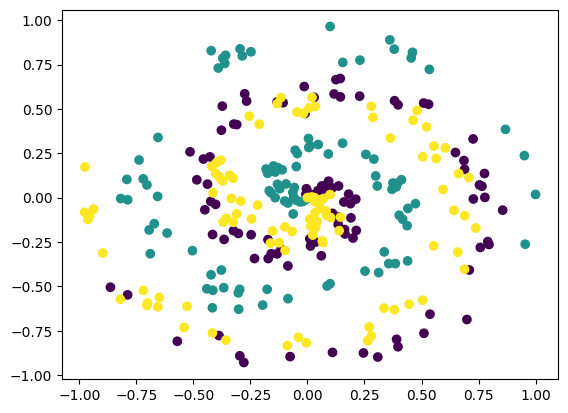

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

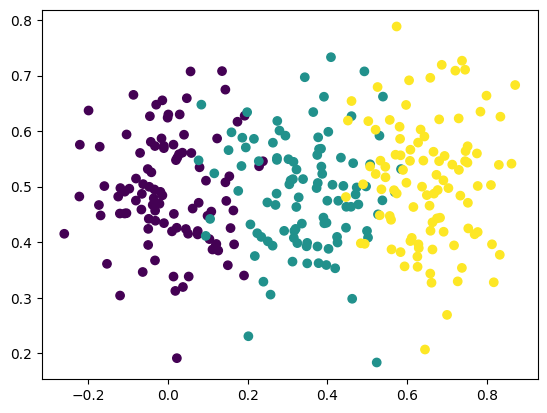

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 1.0986315375663345
acc: 0.2966666666666667


In [11]:
dense1.dweights

array([[ 3.73012415e-04, -2.07391724e-03],
       [ 1.60681099e-05,  5.88444504e-05],
       [-2.75262558e-03,  1.14248198e-03],
       [-2.24795530e-05,  1.73344713e-03]])

In [12]:
dense1.dbiases

array([-1.95210943e-03, -9.70441432e-05, -1.13248314e-03,  2.35518400e-03])

In [13]:
dense2.dweights

array([[-3.87856377e-04, -3.50147061e-05,  1.71572713e-03,
         7.91956735e-04],
       [-1.96754604e-03,  6.96580948e-04, -3.16325086e-03,
        -7.61466949e-04],
       [ 2.35540242e-03, -6.61566242e-04,  1.44752373e-03,
        -3.04897865e-05]])

In [14]:
dense2.dbiases

array([ 0.00087256,  0.00015873, -0.00103128])

In [15]:
from src.optimizers import SGD

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.367, loss: 1.096, lr: 1
epoch: 100, acc: 0.397, loss: 1.079, lr: 1
epoch: 200, acc: 0.410, loss: 1.078, lr: 1
epoch: 300, acc: 0.413, loss: 1.076, lr: 1
epoch: 400, acc: 0.420, loss: 1.073, lr: 1
epoch: 500, acc: 0.423, loss: 1.068, lr: 1
epoch: 600, acc: 0.437, loss: 1.062, lr: 1
epoch: 700, acc: 0.430, loss: 1.054, lr: 1
epoch: 800, acc: 0.467, loss: 1.047, lr: 1
epoch: 900, acc: 0.453, loss: 1.049, lr: 1
epoch: 1000, acc: 0.440, loss: 1.047, lr: 1
epoch: 1100, acc: 0.427, loss: 1.040, lr: 1
epoch: 1200, acc: 0.420, loss: 1.042, lr: 1
epoch: 1300, acc: 0.457, loss: 1.037, lr: 1
epoch: 1400, acc: 0.507, loss: 1.040, lr: 1
epoch: 1500, acc: 0.510, loss: 1.034, lr: 1
epoch: 1600, acc: 0.470, loss: 1.031, lr: 1
epoch: 1700, acc: 0.443, loss: 0.981, lr: 1
epoch: 1800, acc: 0.503, loss: 0.962, lr: 1
epoch: 1900, acc: 0.530, loss: 0.976, lr: 1
epoch: 2000, acc: 0.547, loss: 0.940, lr: 1
epoch: 2100, acc: 0.557, loss: 0.918, lr: 1
epoch: 2200, acc: 0.537, loss: 0.946, lr: 1


In [16]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.270, loss: 1.101, lr: 1
epoch: 100, acc: 0.420, loss: 1.065, lr: 0.9099181073703367
epoch: 200, acc: 0.437, loss: 1.060, lr: 0.8340283569641367
epoch: 300, acc: 0.447, loss: 1.057, lr: 0.7698229407236336
epoch: 400, acc: 0.460, loss: 1.055, lr: 0.7147962830593281
epoch: 500, acc: 0.460, loss: 1.052, lr: 0.66711140760507
epoch: 600, acc: 0.463, loss: 1.048, lr: 0.6253908692933083
epoch: 700, acc: 0.470, loss: 1.043, lr: 0.5885815185403178
epoch: 800, acc: 0.470, loss: 1.038, lr: 0.5558643690939411
epoch: 900, acc: 0.463, loss: 1.031, lr: 0.526592943654555
epoch: 1000, acc: 0.470, loss: 1.024, lr: 0.5002501250625312
epoch: 1100, acc: 0.510, loss: 1.015, lr: 0.4764173415912339
epoch: 1200, acc: 0.553, loss: 1.006, lr: 0.45475216007276037
epoch: 1300, acc: 0.553, loss: 0.997, lr: 0.43497172683775553
epoch: 1400, acc: 0.567, loss: 0.987, lr: 0.4168403501458941
epoch: 1500, acc: 0.573, loss: 0.978, lr: 0.4001600640256102
epoch: 1600, acc: 0.577, loss: 0.969, lr: 0.3847633705

In [17]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.330, loss: 1.098, lr: 1
epoch: 100, acc: 0.467, loss: 0.998, lr: 0.9099181073703367
epoch: 200, acc: 0.600, loss: 0.870, lr: 0.8340283569641367
epoch: 300, acc: 0.703, loss: 0.639, lr: 0.7698229407236336
epoch: 400, acc: 0.747, loss: 0.558, lr: 0.7147962830593281
epoch: 500, acc: 0.787, loss: 0.464, lr: 0.66711140760507
epoch: 600, acc: 0.803, loss: 0.409, lr: 0.6253908692933083
epoch: 700, acc: 0.857, loss: 0.352, lr: 0.5885815185403178
epoch: 800, acc: 0.873, loss: 0.311, lr: 0.5558643690939411
epoch: 900, acc: 0.893, loss: 0.276, lr: 0.526592943654555
epoch: 1000, acc: 0.843, loss: 0.335, lr: 0.5002501250625312
epoch: 1100, acc: 0.870, loss: 0.267, lr: 0.4764173415912339
epoch: 1200, acc: 0.893, loss: 0.252, lr: 0.45475216007276037
epoch: 1300, acc: 0.903, loss: 0.243, lr: 0.43497172683775553
epoch: 1400, acc: 0.903, loss: 0.235, lr: 0.4168403501458941
epoch: 1500, acc: 0.900, loss: 0.228, lr: 0.4001600640256102
epoch: 1600, acc: 0.900, loss: 0.221, lr: 0.3847633705